# Proyecto para analizar los partidos de ATP desde 2008 hasta 2021
1. Se tendrán en cuenta las 3 superficies
2. Primero se hará un análisis general y luego del Big Three

##### Workflow 

1. Extraer los datos 
2. Leerlos 
3. Drop columnas que no queremos 
4. Cambiar outliers (Weight and Height)
5. Crear tablas
6. Buscar las gráficas que queremos 

In [1]:
# Para la manipulación de datos 
import pandas as pd 
import numpy as np 

# Para el análisis de la muestra 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 



## Extracción de datos 

In [2]:
# Leemos el archivo 

df = pd.read_csv(r'C:\Users\Gabriel Castillo\Desktop\Cosas Gabriel\Tennis\tennis_data.csv', low_memory= False)
df.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,pl1_flag,pl1_year_pro,pl1_weight,pl1_height,pl1_hand,pl2_flag,pl2_year_pro,pl2_weight,pl2_height,pl2_hand
0,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Kwon S.W.,...,KOR,2015.0,72.0,180.0,Right-Handed,JPN,2014.0,64.0,170.0,Left-Handed
1,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Monteiro T.,...,BRA,2011.0,78.0,183.0,Left-Handed,GER,2014.0,80.0,188.0,Right-Handed
2,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Djere L.,...,SRB,2013.0,80.0,185.0,Right-Handed,ESP,2011.0,76.0,180.0,Right-Handed
3,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Johnson S.,...,USA,2012.0,86.0,188.0,Right-Handed,AUS,2018.0,85.0,188.0,Right-Handed
4,1,Adelaide,Adelaide International 1,2022-01-04,ATP250,Outdoor,Hard,1st Round,3,Moutet C.,...,FRA,2016.0,71.0,175.0,Left-Handed,DEN,2020.0,77.0,188.0,Right-Handed


## Limpieza de datos

In [3]:
# Obtenemos información del dataset

print('El dataset tiene', df.shape, 'de dimensiones')

El dataset tiene (35923, 54) de dimensiones


In [4]:
# Vemos los tipos de datos que tiene 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35923 entries, 0 to 35922
Data columns (total 54 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ATP           35923 non-null  int64  
 1   Location      35923 non-null  object 
 2   Tournament    35923 non-null  object 
 3   Date          35923 non-null  object 
 4   Series        35923 non-null  object 
 5   Court         35923 non-null  object 
 6   Surface       35923 non-null  object 
 7   Round         35923 non-null  object 
 8   Best of       35923 non-null  int64  
 9   Winner        35923 non-null  object 
 10  Loser         35923 non-null  object 
 11  WRank         35910 non-null  float64
 12  LRank         35843 non-null  float64
 13  WPts          35912 non-null  float64
 14  LPts          35844 non-null  float64
 15  W1            35692 non-null  float64
 16  L1            35695 non-null  float64
 17  W2            35353 non-null  float64
 18  L2            35353 non-nu

In [5]:
# Vemos las columnas que tiene para saber si no necesitamos algunas

df.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'B365W', 'B365L', 'PSW', 'PSL', 'MaxW', 'MaxL',
       'AvgW', 'AvgL', 'EXW', 'EXL', 'LBW', 'LBL', 'SJW', 'SJL', 'UBW', 'UBL',
       'pl1_flag', 'pl1_year_pro', 'pl1_weight', 'pl1_height', 'pl1_hand',
       'pl2_flag', 'pl2_year_pro', 'pl2_weight', 'pl2_height', 'pl2_hand'],
      dtype='object')

In [6]:
# Eliminamos las columnas no necesarias 

df = df.drop(columns=['B365W', 'B365L', 'PSW', 'PSL', 'MaxW', 'MaxL', 'AvgW', 'AvgL', 'EXW', 'EXL', 'LBW', 'LBL', 'SJW', 'SJL', 'UBW', 'UBL',  'pl1_flag', 'pl2_flag', 'pl2_year_pro', 'pl1_year_pro'])
df.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,L5,Wsets,Lsets,Comment,pl1_weight,pl1_height,pl1_hand,pl2_weight,pl2_height,pl2_hand
0,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Kwon S.W.,...,NaN,2.0,0.0,Completed,72.0,180.0,Right-Handed,64.0,170.0,Left-Handed
1,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Monteiro T.,...,NaN,2.0,1.0,Completed,78.0,183.0,Left-Handed,80.0,188.0,Right-Handed
2,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Djere L.,...,NaN,2.0,0.0,Completed,80.0,185.0,Right-Handed,76.0,180.0,Right-Handed
3,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Johnson S.,...,NaN,2.0,1.0,Completed,86.0,188.0,Right-Handed,85.0,188.0,Right-Handed
4,1,Adelaide,Adelaide International 1,2022-01-04,ATP250,Outdoor,Hard,1st Round,3,Moutet C.,...,NaN,2.0,0.0,Completed,71.0,175.0,Left-Handed,77.0,188.0,Right-Handed


In [7]:
# Chequeamos outliers en altura

df.pl1_height.value_counts()


185.0     6741
188.0     5340
183.0     4923
191.0     3487
180.0     2743
193.0     2596
178.0     2283
198.0     2215
196.0     2104
175.0     1478
203.0      459
208.0      430
170.0      353
211.0      332
173.0      241
168.0       64
201.0       26
96.0        24
182.0       24
70.0         6
195.0        5
10.0         3
184.0        2
1883.0       1
172.0        1
Name: pl1_height, dtype: int64

In [8]:
# Chequeamos outliers en peso 

df.pl1_weight.value_counts()


80.0     3487
75.0     2817
77.0     2113
85.0     1965
70.0     1950
82.0     1826
73.0     1743
84.0     1740
86.0     1491
81.0     1400
83.0     1371
88.0     1298
76.0     1283
78.0     1278
79.0     1236
91.0     1113
74.0     1027
87.0      915
89.0      740
68.0      537
72.0      498
95.0      459
71.0      458
108.0     430
97.0      378
98.0      359
93.0      358
92.0      332
104.0     289
64.0      272
69.0      225
65.0      193
100.0     181
94.0       85
96.0       11
90.0        8
7.0         5
60.0        4
63.0        3
66.0        3
Name: pl1_weight, dtype: int64

In [9]:
# Modificamos los outliers en altura
df.pl1_height.replace(1883.0, 183.0, inplace=True)
df.pl1_height.replace(10.0, 173.0, inplace= True)
df.pl1_height.replace(70.0, 173.0, inplace=True)
df.pl1_height.replace(96.0, 188.0, inplace= True)


In [10]:
# Modificamos los outliers en peso

df.pl1_weight.replace(173.0, 75.0, inplace=True)

In [11]:
df.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,L5,Wsets,Lsets,Comment,pl1_weight,pl1_height,pl1_hand,pl2_weight,pl2_height,pl2_hand
0,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Kwon S.W.,...,NaN,2.0,0.0,Completed,72.0,180.0,Right-Handed,64.0,170.0,Left-Handed
1,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Monteiro T.,...,NaN,2.0,1.0,Completed,78.0,183.0,Left-Handed,80.0,188.0,Right-Handed
2,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Djere L.,...,NaN,2.0,0.0,Completed,80.0,185.0,Right-Handed,76.0,180.0,Right-Handed
3,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Johnson S.,...,NaN,2.0,1.0,Completed,86.0,188.0,Right-Handed,85.0,188.0,Right-Handed
4,1,Adelaide,Adelaide International 1,2022-01-04,ATP250,Outdoor,Hard,1st Round,3,Moutet C.,...,NaN,2.0,0.0,Completed,71.0,175.0,Left-Handed,77.0,188.0,Right-Handed


In [12]:
# Creamos una nueva columna donde tenga en cuenta el peso del jugador ganador para hacer las gráficas 

limits = [165, 175, 185, 195, 205, 215]
df["Altura"] = pd.cut(df["pl1_height"], bins=limits)
df.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Wsets,Lsets,Comment,pl1_weight,pl1_height,pl1_hand,pl2_weight,pl2_height,pl2_hand,Altura
0,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Kwon S.W.,...,2.0,0.0,Completed,72.0,180.0,Right-Handed,64.0,170.0,Left-Handed,"(175, 185]"
1,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Monteiro T.,...,2.0,1.0,Completed,78.0,183.0,Left-Handed,80.0,188.0,Right-Handed,"(175, 185]"
2,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Djere L.,...,2.0,0.0,Completed,80.0,185.0,Right-Handed,76.0,180.0,Right-Handed,"(175, 185]"
3,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Johnson S.,...,2.0,1.0,Completed,86.0,188.0,Right-Handed,85.0,188.0,Right-Handed,"(185, 195]"
4,1,Adelaide,Adelaide International 1,2022-01-04,ATP250,Outdoor,Hard,1st Round,3,Moutet C.,...,2.0,0.0,Completed,71.0,175.0,Left-Handed,77.0,188.0,Right-Handed,"(165, 175]"


In [13]:
# Contamos cuantas veces dentro del dataset aparece la altura 

df.Altura.value_counts()

(175, 185]    16717
(185, 195]    11452
(195, 205]     4804
(165, 175]     2146
(205, 215]      762
Name: Altura, dtype: int64

In [14]:
df.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'pl1_weight', 'pl1_height', 'pl1_hand',
       'pl2_weight', 'pl2_height', 'pl2_hand', 'Altura'],
      dtype='object')

In [15]:
# surface = df.groupby('Surface')[['WPts', 'LPts']].sum()
# surface

In [16]:
# loc = df.groupby('Location')[['WPts', 'LPts']].sum()
# loc

In [17]:
# ATP = df.groupby('ATP')[['WPts', 'LPts']].sum()
# ATP

## Visualización de los datos generales


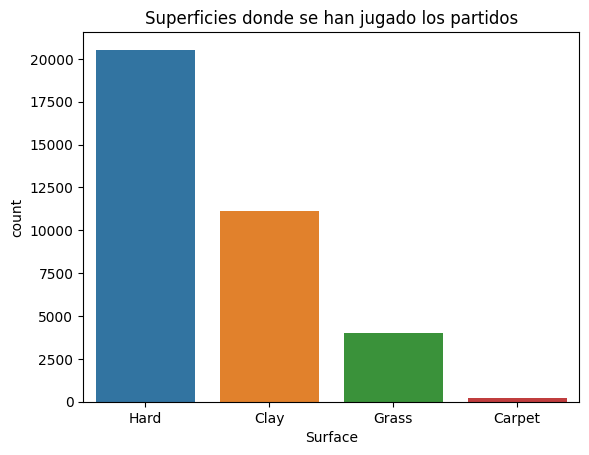

In [18]:
# Distribución de la superficie de los partidos 

sns.countplot(df, x= 'Surface')
plt.title('Superficies donde se han jugado los partidos');


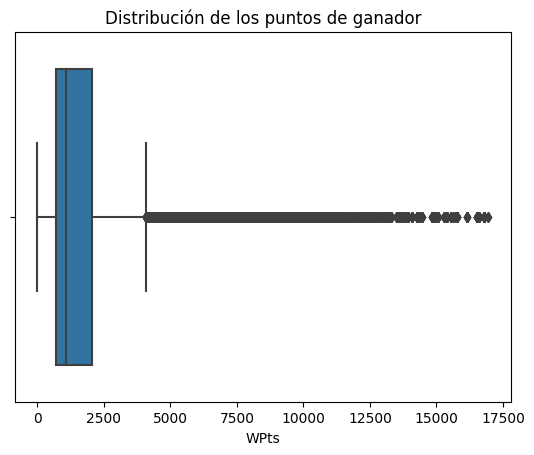

In [19]:
# Distribución de los puntos de los ganadores 

sns.boxplot(df, x = df.WPts)
plt.title('Distribución de los puntos de ganador');

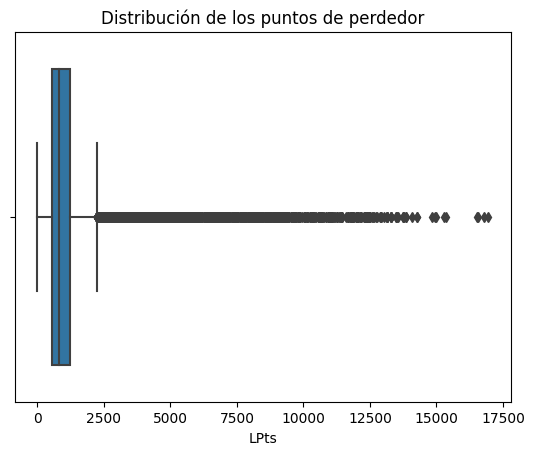

In [20]:
# Distribución de los puntos de los ganadores 

sns.boxplot(df, x = df.LPts)
plt.title('Distribución de los puntos de perdedor');

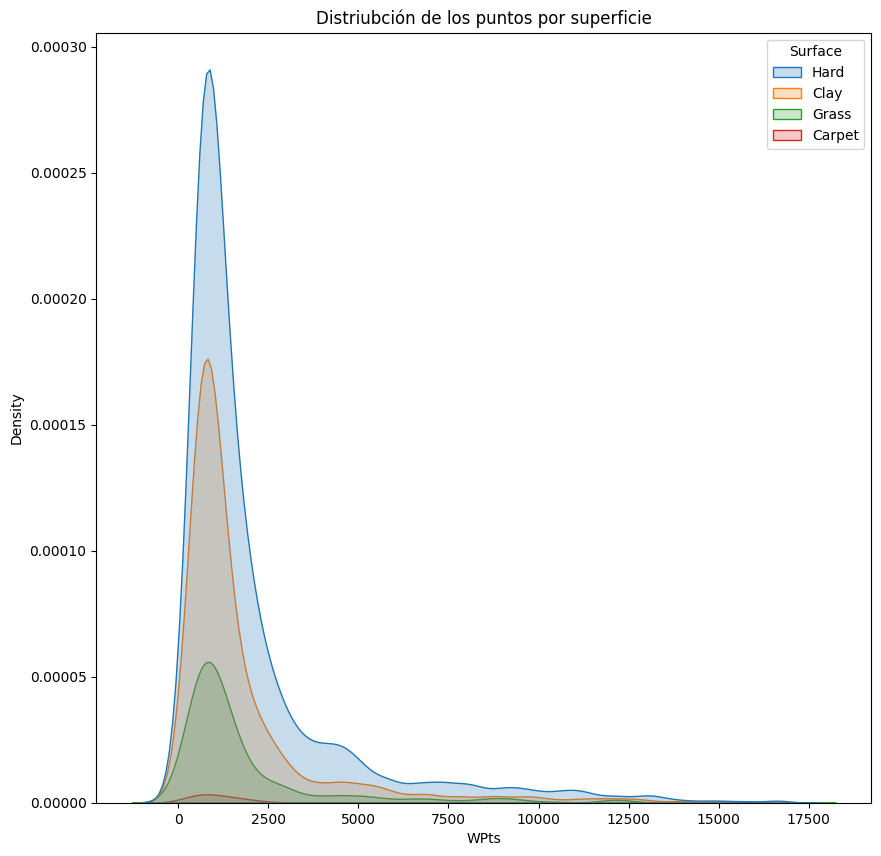

In [21]:
# Analisis de los puntos para ganar depèndiendo de la superficie

hue = df.Surface
plt.figure(figsize=(10,10))
sns.kdeplot(x= df.WPts, hue=hue, fill=True)
plt.title('Distriubción de los puntos por superficie');

In [22]:
df.WPts.describe()

count    35912.000000
mean      1976.910977
std       2411.581458
min          1.000000
25%        701.000000
50%       1079.000000
75%       2050.000000
max      16950.000000
Name: WPts, dtype: float64

In [23]:
df.LPts.describe()

count    35844.000000
mean      1142.708905
std       1301.782291
min          1.000000
25%        549.000000
50%        805.000000
75%       1225.000000
max      16950.000000
Name: LPts, dtype: float64

In [24]:
df[df['Winner'] == 'Djokovic N.']

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Wsets,Lsets,Comment,pl1_weight,pl1_height,pl1_hand,pl2_weight,pl2_height,pl2_hand,Altura
599,5,Melbourne,Australian Open,2021-02-08,Grand Slam,Outdoor,Hard,1st Round,5,Djokovic N.,...,3.0,0.0,Completed,77.0,188.0,Right-Handed,75.0,188.0,Right-Handed,"(185, 195]"
639,5,Melbourne,Australian Open,2021-02-10,Grand Slam,Outdoor,Hard,2nd Round,5,Djokovic N.,...,3.0,1.0,Completed,77.0,188.0,Right-Handed,77.0,188.0,Right-Handed,"(185, 195]"
672,5,Melbourne,Australian Open,2021-02-12,Grand Slam,Outdoor,Hard,3rd Round,5,Djokovic N.,...,3.0,2.0,Completed,77.0,188.0,Right-Handed,84.0,193.0,Right-Handed,"(185, 195]"
684,5,Melbourne,Australian Open,2021-02-14,Grand Slam,Outdoor,Hard,4th Round,5,Djokovic N.,...,3.0,1.0,Completed,77.0,188.0,Right-Handed,98.0,196.0,Right-Handed,"(185, 195]"
690,5,Melbourne,Australian Open,2021-02-16,Grand Slam,Outdoor,Hard,Quarterfinals,5,Djokovic N.,...,3.0,1.0,Completed,77.0,188.0,Right-Handed,86.0,198.0,Right-Handed,"(185, 195]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35879,64,Paris,BNP Paribas,2008-10-28,Masters,Indoor,Carpet,2nd Round,3,Djokovic N.,...,1.0,0.0,Retired,77.0,188.0,Right-Handed,82.0,185.0,Right-Handed,"(185, 195]"
35908,65,Shanghai,Masters Cup,2008-11-09,Masters Cup,Indoor,Hard,Round Robin,3,Djokovic N.,...,2.0,0.0,Completed,77.0,188.0,Right-Handed,97.0,198.0,Right-Handed,"(185, 195]"
35913,65,Shanghai,Masters Cup,2008-11-11,Masters Cup,Indoor,Hard,Round Robin,3,Djokovic N.,...,2.0,1.0,Completed,77.0,188.0,Right-Handed,70.0,178.0,Right-Handed,"(185, 195]"
35920,65,Shanghai,Masters Cup,2008-11-15,Masters Cup,Indoor,Hard,Semifinals,3,Djokovic N.,...,2.0,1.0,Completed,77.0,188.0,Right-Handed,70.0,183.0,Right-Handed,"(185, 195]"


## Visualización de los datos del Big 3

In [25]:
# Creamos un df donde solo tengamos los resultados de los 3 jugadores que nos interesan

b3W = df[(df['Winner']=='Nadal R.') |   (df['Winner']== 'Federer R.') | (df['Winner']== 'Djokovic N.')].reset_index().drop(columns=('index'), index= 1)
b3L = df[(df['Loser']=='Nadal R.') |   (df['Loser']== 'Federer R.') | (df['Loser']== 'Djokovic N.')].reset_index().drop(columns=('index'), index= 1)


In [102]:
b3W.Winner.value_counts()

Djokovic N.    833
Nadal R.       755
Federer R.     680
Name: Winner, dtype: int64

In [32]:
b3L.Loser.value_counts()

Nadal R.       143
Federer R.     141
Djokovic N.    138
Name: Loser, dtype: int64

In [26]:
# Vemos el df

b3W.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Wsets,Lsets,Comment,pl1_weight,pl1_height,pl1_hand,pl2_weight,pl2_height,pl2_hand,Altura
0,2,Melbourne,Melbourne Summer Set,2022-01-06,ATP250,Outdoor,Hard,2nd Round,3,Nadal R.,...,2.0,0.0,Completed,85.0,185.0,Left-Handed,70.0,175.0,Right-Handed,"(175, 185]"
2,2,Melbourne,Melbourne Summer Set,2022-01-08,ATP250,Outdoor,Hard,Semifinals,3,Nadal R.,...,2.0,0.0,Completed,85.0,185.0,Left-Handed,79.0,188.0,Right-Handed,"(175, 185]"
3,2,Melbourne,Melbourne Summer Set,2022-01-09,ATP250,Outdoor,Hard,The Final,3,Nadal R.,...,2.0,0.0,Completed,85.0,185.0,Left-Handed,91.0,198.0,Right-Handed,"(175, 185]"
4,5,Melbourne,Australian Open,2022-01-17,Grand Slam,Outdoor,Hard,1st Round,5,Nadal R.,...,3.0,0.0,Completed,85.0,185.0,Left-Handed,77.0,180.0,Right-Handed,"(175, 185]"
5,5,Melbourne,Australian Open,2022-01-19,Grand Slam,Outdoor,Hard,2nd Round,5,Nadal R.,...,3.0,0.0,Completed,85.0,185.0,Left-Handed,84.0,193.0,Right-Handed,"(175, 185]"


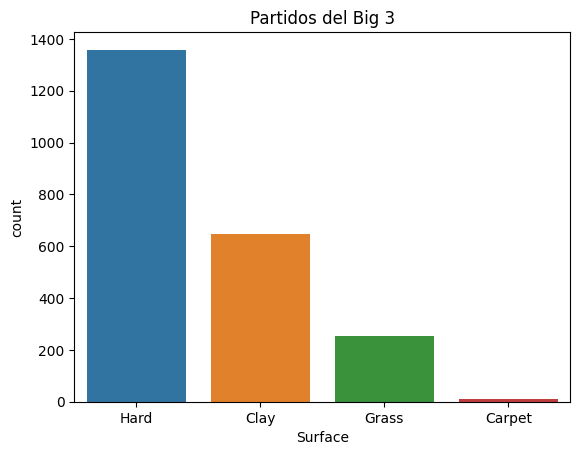

In [27]:
# Hacemos como antes y vemos las superficies que han jugado 

sns.countplot(b3W, x= 'Surface')
plt.title('Partidos del Big 3');

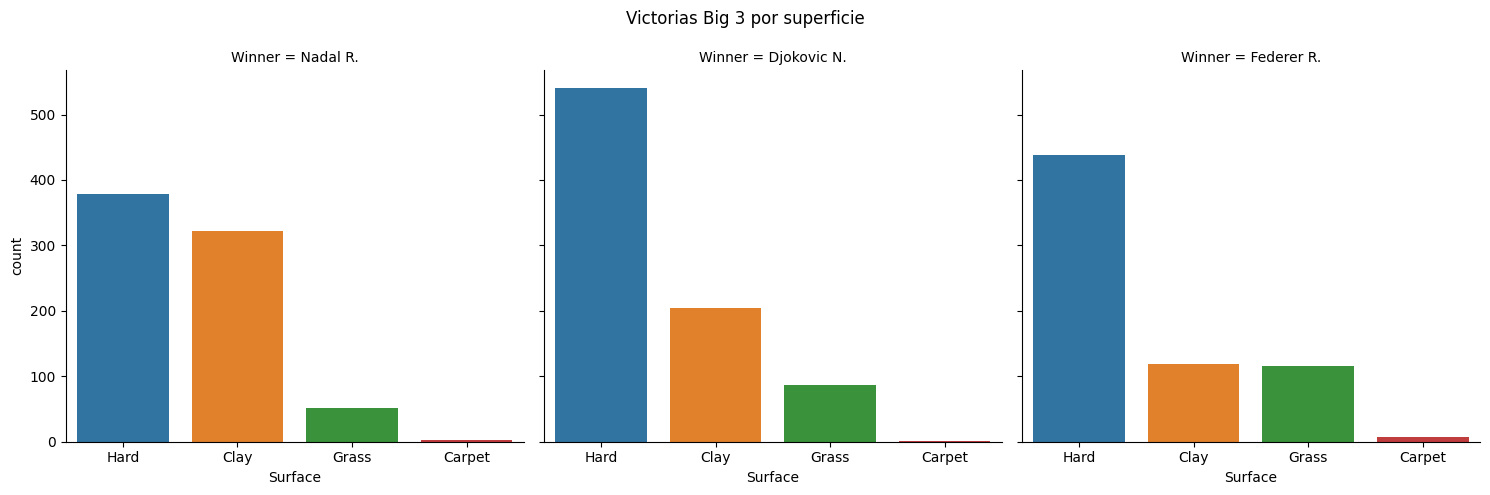

In [98]:
# Vemos las victorias y derrotas de los jguadores 


sns.catplot(data=b3W,
            x='Surface',
            col='Winner',
            kind='count')

plt.subplots_adjust(top=0.86)  
plt.suptitle('Victorias Big 3 por superficie');

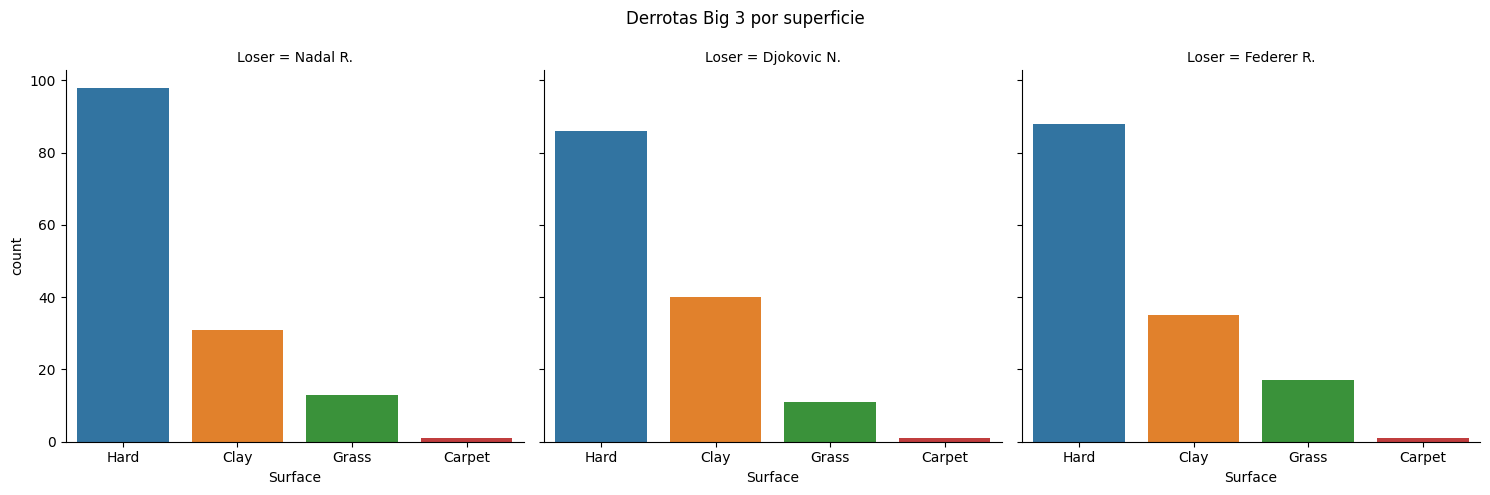

In [100]:
# Vemos las victorias y derrotas de los jguadores 


sns.catplot(data= b3L, 
            x= 'Surface',
            col= 'Loser',
            kind= 'count')


plt.subplots_adjust(top=0.86)  
plt.suptitle('Derrotas Big 3 por superficie') ;

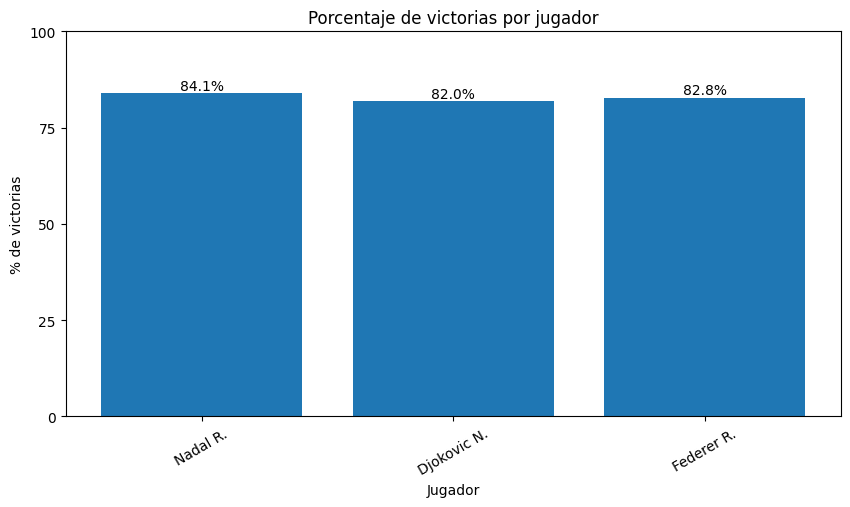

In [123]:
# Creamos df para ver por porcentaje las cosas 
datos = {'Jugador': ['Nadal R.', 'Djokovic N.', 'Federer R.'],
         'Partidos': [898,1016,821],
          'Victorias': [755, 833, 680], 
          'Derrotas': [143, 138, 141]}
per = pd.DataFrame(datos)
per['% de victorias'] = per.Victorias/per.Partidos * 100

plt.figure(figsize=(10, 5))
bars = plt.bar(per.Jugador, per['% de victorias'])
plt.xlabel('Jugador')
plt.ylabel('% de victorias')
plt.title('Porcentaje de victorias por jugador')
plt.xticks(rotation=30)
plt.yticks([0, 25, 50, 75, 100])  
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.show()